## HW_4_Task

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

#### 1.1. Скачать следующие данные: kc-house-data и laptop_price

In [5]:
house = pd.read_csv('../Seminar_2/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2. Изучите стоимости недвижимости

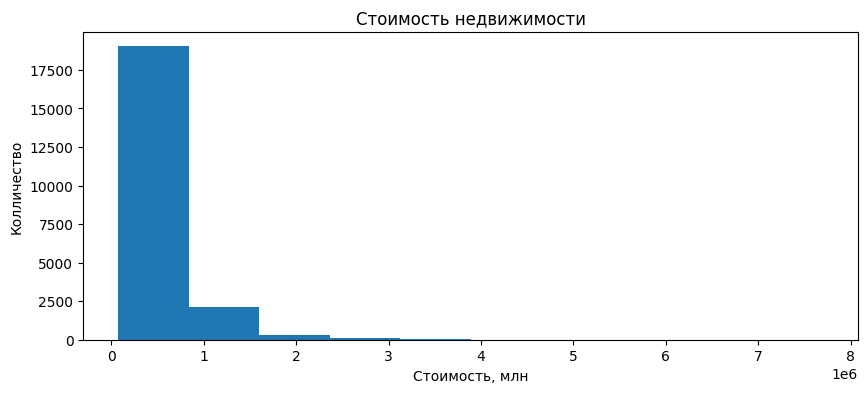

In [6]:
plt.figure(figsize=(10,4))
plt.hist(house['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость, млн')
plt.ylabel('Колличество');

#### 1.3 Изучите распределение квадратуры жилой площади

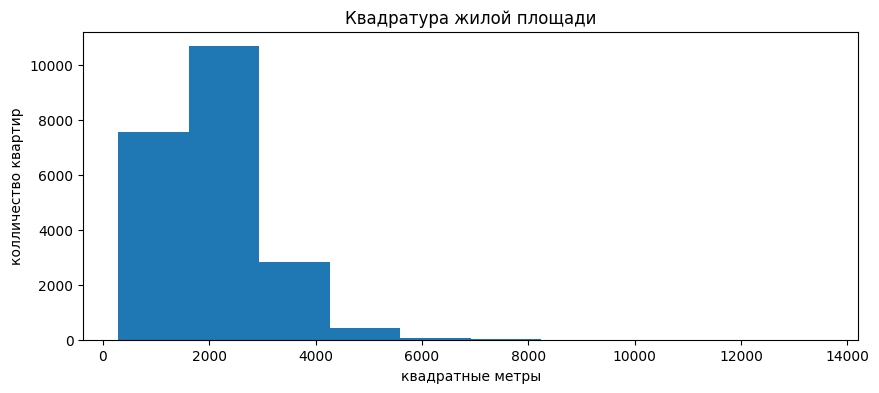

In [7]:
plt.figure(figsize=(10,4))
plt.hist(house['sqft_living'])
plt.title('Квадратура жилой площади')
plt.xlabel('квадратные метры')
plt.ylabel('колличество квартир');

#### 1.4. Изучите распределение года постройки

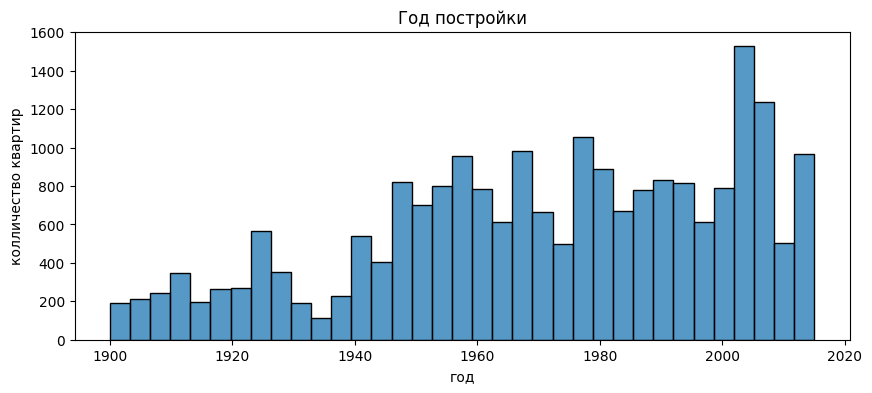

In [8]:
plt.figure(figsize=(10,4))
sns.histplot(house['yr_built'])
plt.title('Год постройки')
plt.xlabel('год')
plt.ylabel('колличество квартир');

### Задача 2
- Постройте график
- Сделайте выводы

#### 2.1. Изучите распределение домов от наличия вида на набережную

In [9]:
house_waterfront = house['waterfront'].value_counts()
house_waterfront.index = ['no','yes']
house_waterfront

no     21450
yes      163
Name: count, dtype: int64

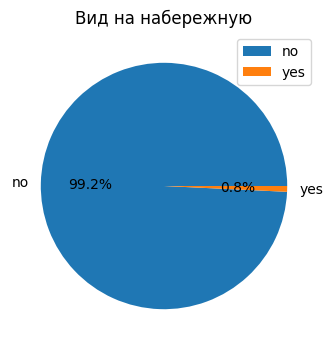

In [10]:
plt.figure(figsize=(4,4))
plt.pie(house_waterfront,autopct='%1.1f%%',labels=house_waterfront.index)
plt.title('Вид на набережную')
plt.legend(house_waterfront.index);

#### 2.2. Изучите распределение этажей домов

In [11]:
house_floor = house['floors'].value_counts()
house_floor

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

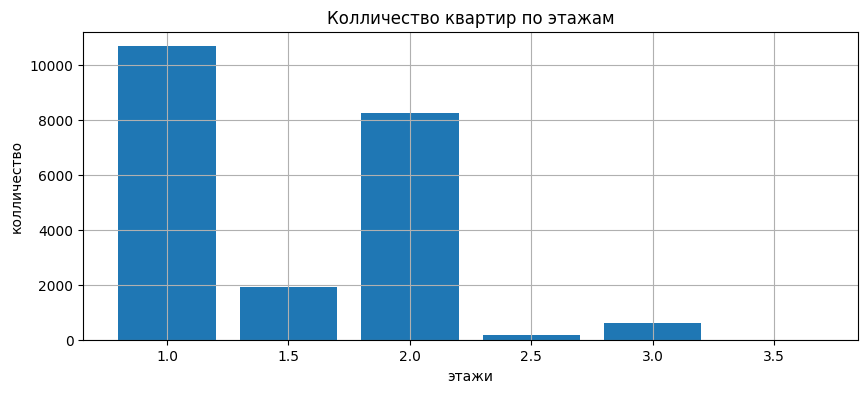

In [12]:
plt.figure(figsize=(10,4))
plt.bar(house_floor.index,house_floor.values,width=0.4)
plt.xlabel('этажи')
plt.ylabel('колличество')
plt.title('Колличество квартир по этажам')
plt.grid()

#### 2.3. Изучите распределение состояния домов

In [13]:
house_condition = house['condition'].value_counts()
house_condition

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

<Axes: title={'center': 'Состояние домов'}, xlabel='condition'>

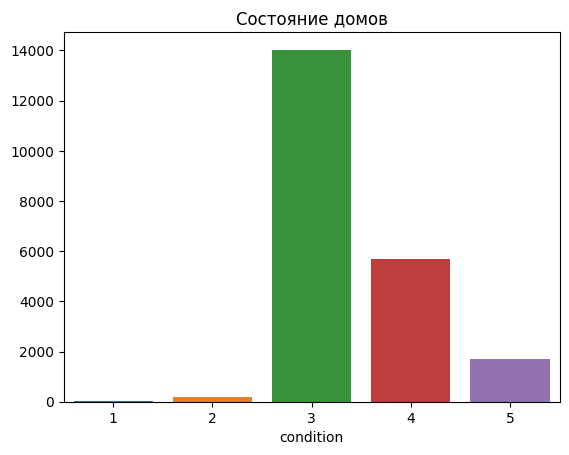

In [14]:
plt.title('Состояние домов')
sns.barplot(x=house_condition.index,y=house_condition.values)

### Задание 3

- Исследуйте, какие характеристики недвижимости
влияют на стоимость недвижимости,<br> с применением
не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling:<br> дополнить
каждый график письменными выводами и
наблюдениями.

In [15]:
water_price_0 = house['price'][house['waterfront']==0]
water_price_1 = house['price'][house['waterfront']==1]

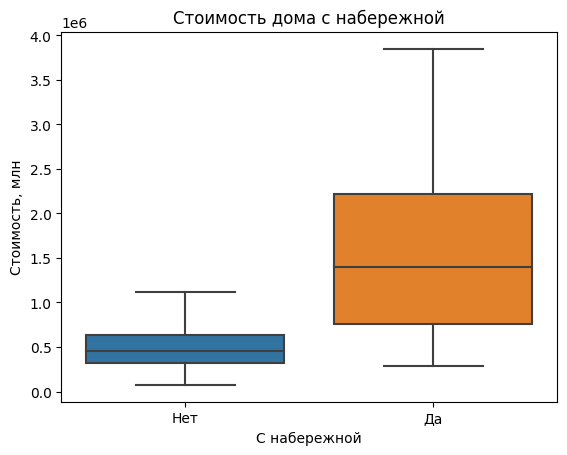

In [16]:
sns.boxplot(data=[water_price_0,water_price_1], showfliers=False)
plt.xticks([0,1],['Нет', 'Да'])
plt.title('Стоимость дома с набережной')
plt.xlabel('С набережной')
plt.ylabel('Стоимость, млн');

Дома с видом на набережную дороже.<br>
 Большое колличество домов с ценой:
  - набережная ~1.4 млн
  - без ~ 0.4 млн

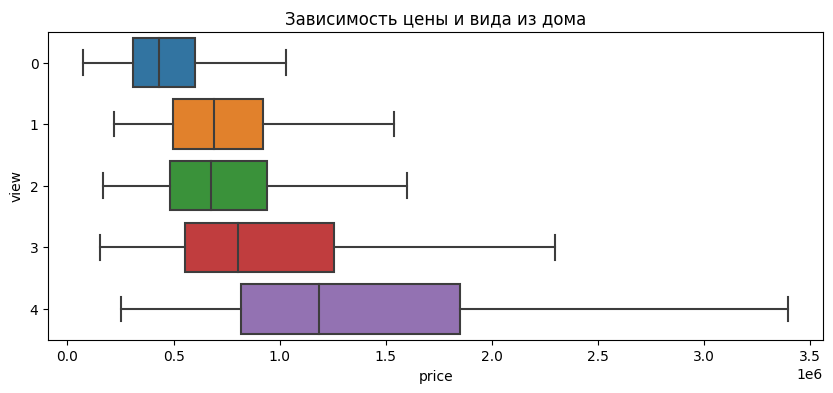

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(x=house['price'],y=house['view'].astype('str').sort_values(),showfliers=False)
plt.title('Зависимость цены и вида из дома');

С хорошим видом по оценке - *4*, дома дороже 

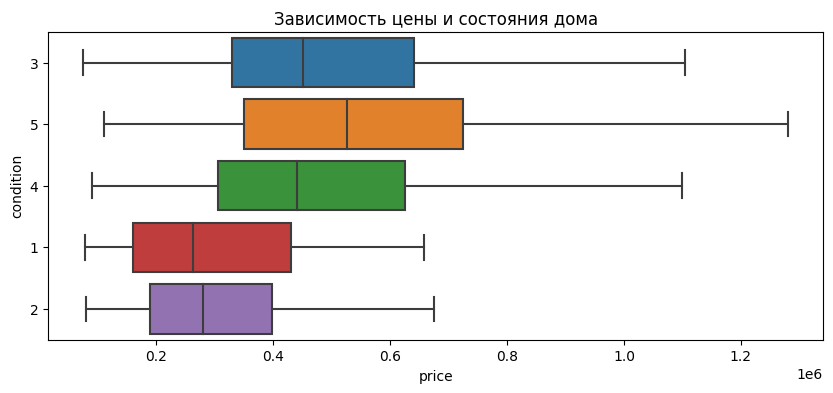

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(x=house['price'],y=house['condition'].astype('str'),showfliers=False)
plt.title('Зависимость цены и состояния дома');

Дома с состоянием дома - 3 стоят примерно, как с состоянием дома - 4. Есть и дороже

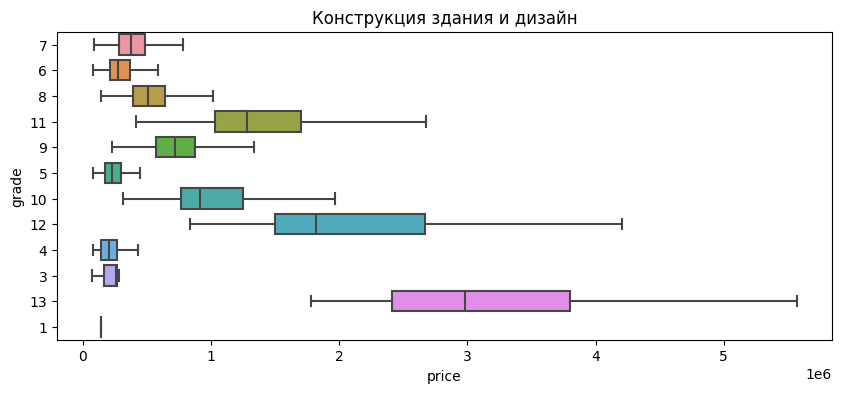

In [25]:
plt.figure(figsize=(10,4))
sns.boxplot(x=house['price'],y=house['grade'].astype('str'),showfliers=False)
plt.title('Конструкция здания и дизайн');

Самые дорогие дома с конструкцией и дизайном - 13.

<Figure size 500x500 with 0 Axes>

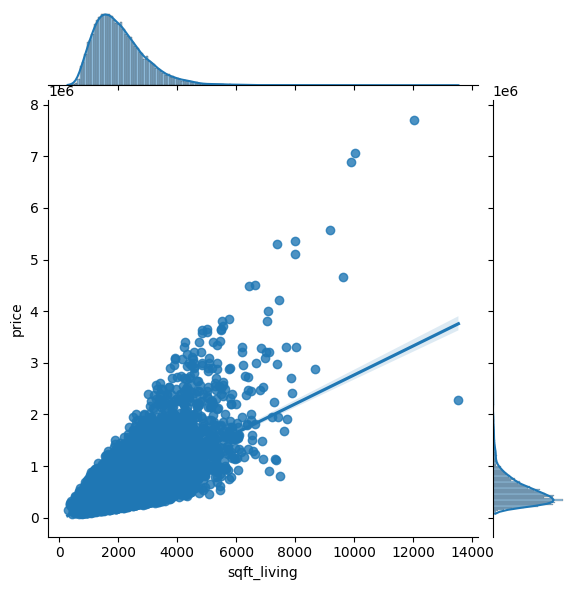

In [30]:
plt.figure(figsize=(5,5))
sns.jointplot(x=house['sqft_living'],y=house['price'],kind='reg');

Чем больше колличество жилой площади, тем больше стоимость дома

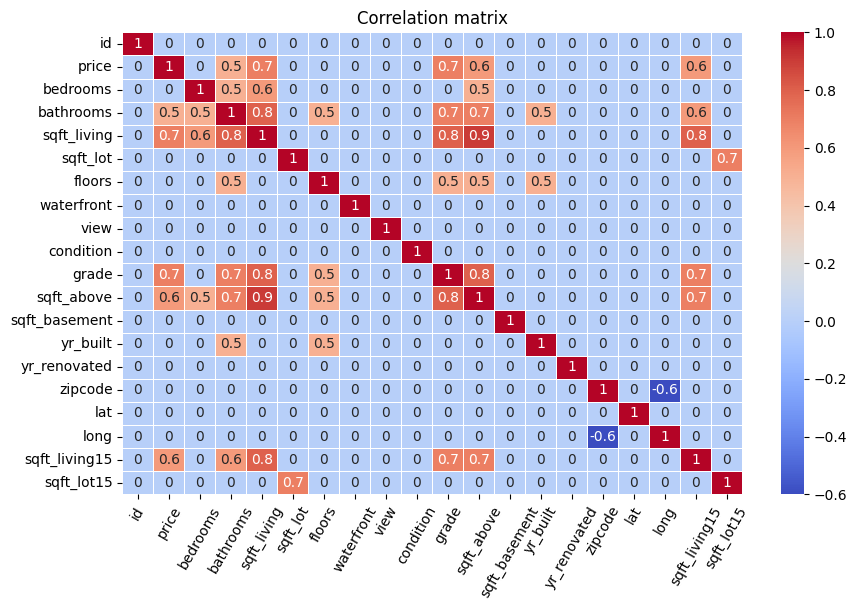

In [48]:
corr_matrix = house.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.5] = 0
corr_matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title("Correlation matrix")
plt.xticks(rotation=60);